In [ ]:
# To load the mnist data
from keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential

# importing various types of hidden layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

# Adam optimizer for better LR and less loss
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Split the data into training and testing
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()

# Print the dimensions of the dataset
print('Train: X = ', trainX.shape)
print('Test: X = ', testX.shape)

4422102/4422102 [==============================] - 0s 0us/step
Train: X =  (60000, 28, 28)
Test: X =  (10000, 28, 28)


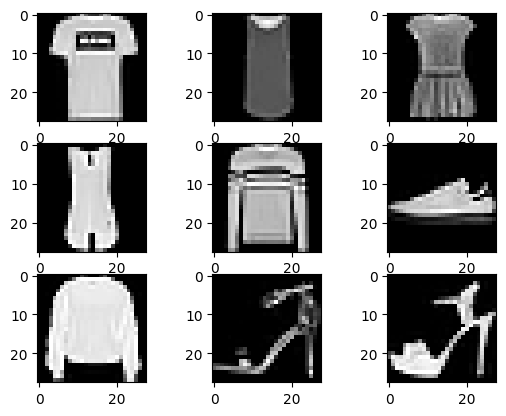

In [ ]:
for i in range(1, 10):
    # Create a 3x3 grid and place the
    # image in ith position of grid
    plt.subplot(3, 3, i)
    # Insert ith image with the color map 'grap'
    plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))

# Display the entire plot
plt.show()

In [ ]:
trainX = np.expand_dims(trainX, -1)
testX = np.expand_dims(testX, -1)

print(trainX.shape)

(60000, 28, 28, 1)


In [ ]:
def model_arch():
    models = Sequential()

    # We are learning 64
    # filters with a kernel size of 5x5
    models.add(Conv2D(64, (5, 5),
                      padding="same",
                      activation="relu",
                      input_shape=(28, 28, 1)))

    # Max pooling will reduce the
    # size with a kernel size of 2x2
    models.add(MaxPooling2D(pool_size=(2, 2)))
    models.add(Conv2D(128, (5, 5), padding="same",
                      activation="relu"))

    models.add(MaxPooling2D(pool_size=(2, 2)))
    models.add(Conv2D(256, (5, 5), padding="same",
                      activation="relu"))

    models.add(MaxPooling2D(pool_size=(2, 2)))

    # Once the convolutional and pooling
    # operations are done the layer
    # is flattened and fully connected layers
    # are added
    models.add(Flatten())
    models.add(Dense(256, activation="relu"))

    # Finally as there are total 10
    # classes to be added a FCC layer of
    # 10 is created with a softmax activation
    # function
    models.add(Dense(10, activation="softmax"))
    return models

In [ ]:
model = model_arch()

model.compile(optimizer=Adam(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['sparse_categorical_accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        1664      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 128)       204928    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 256)         819456    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 256)        0

In [ ]:
history = model.fit(
    trainX.astype(np.float32), trainy.astype(np.float32),
    epochs=10,
    steps_per_epoch=100,
    validation_split=0.33
)

Epoch 1/10
100/100 [==============================] - 19s 67ms/step - loss: 3.3589 - sparse_categorical_accuracy: 0.6309 - val_loss: 0.4627 - val_sparse_categorical_accuracy: 0.8293
Epoch 2/10
100/100 [==============================] - 5s 52ms/step - loss: 0.3881 - sparse_categorical_accuracy: 0.8584 - val_loss: 0.3622 - val_sparse_categorical_accuracy: 0.8651
Epoch 3/10
100/100 [==============================] - 6s 62ms/step - loss: 0.3152 - sparse_categorical_accuracy: 0.8846 - val_loss: 0.3179 - val_sparse_categorical_accuracy: 0.8865
Epoch 4/10
100/100 [==============================] - 5s 52ms/step - loss: 0.2853 - sparse_categorical_accuracy: 0.8952 - val_loss: 0.3338 - val_sparse_categorical_accuracy: 0.8760
Epoch 5/10
100/100 [==============================] - 6s 62ms/step - loss: 0.2557 - sparse_categorical_accuracy: 0.9068 - val_loss: 0.3003 - val_sparse_categorical_accuracy: 0.8925
Epoch 6/10
100/100 [==============================] - 6s 62ms/step - loss: 0.2325 - sparse_cat

In [ ]:
model.save_weights('./model.h5', overwrite=True)

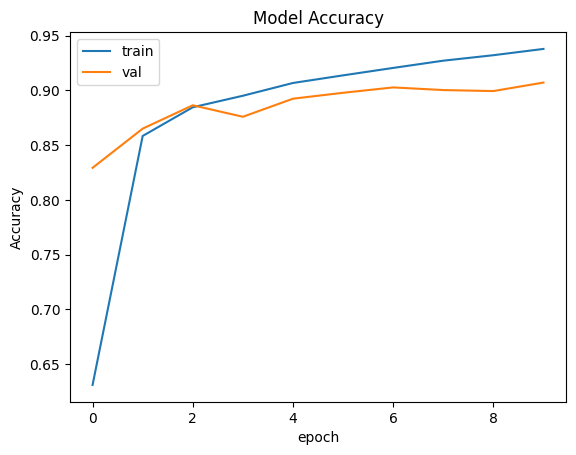

In [ ]:
# Accuracy vs Epoch plot
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

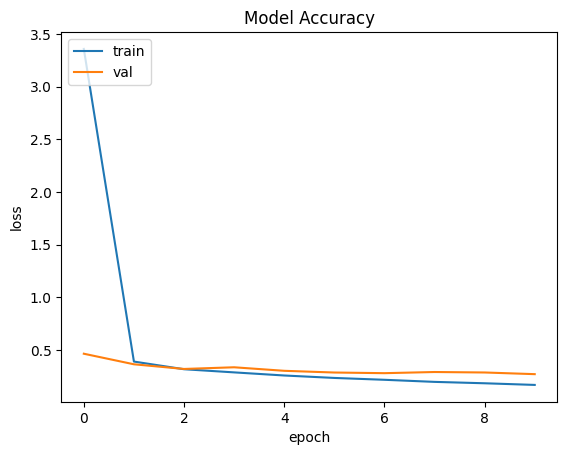

In [ ]:

# Loss vs Epoch plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

1/1 [==============================] - 0s 209ms/step
pullover


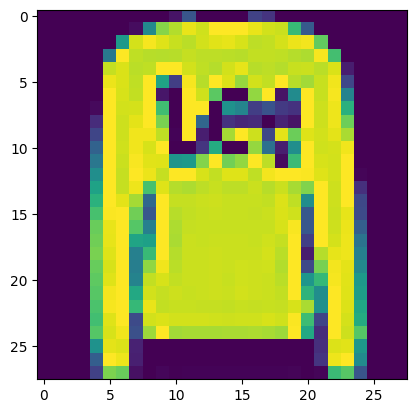

In [ ]:
# There are 10 output labels for the Fashion MNIST dataset
labels = ['t_shirt', 'trouser', 'pullover', 'dress', 'coat',
          'sandal', 'shirt', 'sneaker', 'bag', 'ankle_boots']
# Make a prediction
predictions = model.predict(testX[1:2])
label = labels[np.argmax(predictions)]

print(label)
plt.imshow(testX[1:2][0])
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Load the Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

for i in range(1, 10):
    # Create a 3x3 grid and place the
    # image in ith position of grid
    plt.subplot(3, 3, i)
    plt.imshow(train_images[i])

# Display the entire plot
plt.show()

# Preprocess the data
train_images = train_images.astype("float32") / 255.0
test_images = test_images.astype("float32") / 255.0

# Reshape the images
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

# Create the CNN model
model = keras.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")
])

# Compile the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Train the model
model.fit(train_images, train_labels, batch_size=128, epochs=10, validation_split=0.2)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


4422102/4422102 [==============================] - 0s 0us/step
Epoch 1/10
375/375 [==============================] - 15s 6ms/step - loss: 0.5905 - accuracy: 0.7907 - val_loss: 0.4359 - val_accuracy: 0.8443
Epoch 2/10
375/375 [==============================] - 2s 5ms/step - loss: 0.3782 - accuracy: 0.8649 - val_loss: 0.3499 - val_accuracy: 0.8757
Epoch 3/10
375/375 [==============================] - 2s 5ms/step - loss: 0.3301 - accuracy: 0.8811 - val_loss: 0.3266 - val_accuracy: 0.8834
Epoch 4/10
375/375 [==============================] - 2s 5ms/step - loss: 0.2959 - accuracy: 0.8928 - val_loss: 0.3185 - val_accuracy: 0.8841
Epoch 5/10
375/375 [==============================] - 2s 5ms/step - loss: 0.2698 - accuracy: 0.9015 - val_loss: 0.2968 - val_accuracy: 0.8916
Epoch 6/10
375/375 [==============================] - 2s 5ms/step - loss: 0.2509 - accuracy: 0.9068 - val_loss: 0.2673 - val_accuracy: 0.9028
Epoch 7/10
375/375 [==============================] - 2s 5ms/step - loss: 0.2336 - a

1/1 [==============================] - 0s 26ms/step


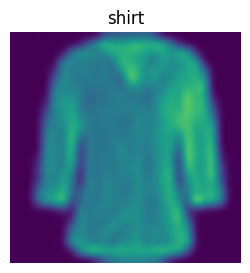

In [ ]:
import matplotlib.pyplot as plt

prediction = model.predict(test_images[4:5])
predicted_label = labels[prediction.argmax()]

plt.figure(figsize=(3, 3))
plt.imshow(test_images[4:5].reshape(28, 28), interpolation='bicubic')
plt.title(predicted_label)
plt.axis('off')
plt.show()